SVM with Bayesian Optimization (Optimized Hyperparameters)

R2 Score: 0.9980
Taguchi: 
Average (K) = 313.104725 
Minimum (K) = 310.335 
SVM: 
Average (K) = 310.3326666666666 
Minimum (K) = 310.202 
RFR: 
Average (K) = 310.61571428571426 
Minimum (K) = 310.287


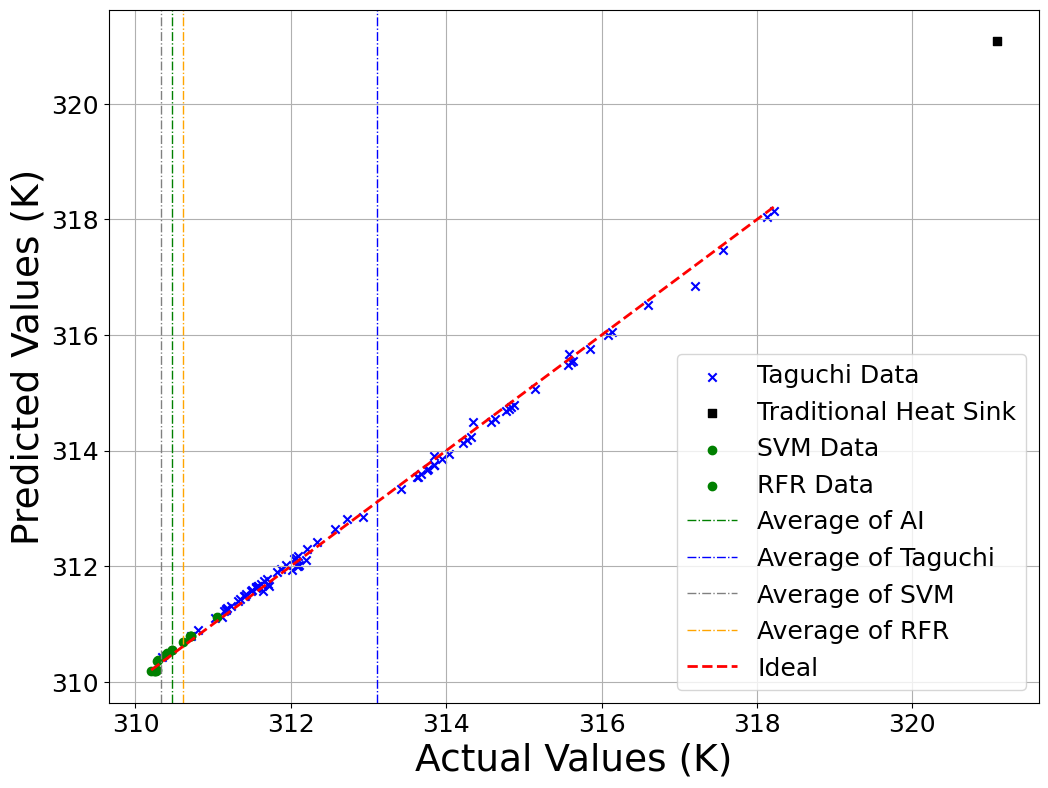

,Y-Bound,Cell Size,XY-Period,Z-P-Start,Z-P-End,t-base_min,Heigh-min_t,t-base_max,Height-max_t,radial-ramp_start-t,Start-radius_t-ramp,Radial-ramp_end-t,End-radius_t-ramp,Temperature,TAI
0,90.0,3.0,0.1,0.1,0.1,1.0,0.0,1.0,40.0,0.5,3.0,5.0,7.0,314.867,1
1,100.0,3.0,0.5,0.3,0.3,1.0,20.0,1.4,60.0,0.8,7.0,5.0,7.0,312.062,1
2,100.0,3.0,0.5,0.3,0.1,1.2,40.0,1.0,80.0,1.2,3.0,15.0,9.5,312.727,1
3,90.0,3.0,0.1,0.1,0.2,1.2,20.0,1.2,60.0,0.8,5.0,15.0,9.5,314.631,1
4,110.0,3.0,0.9,0.2,0.3,1.2,0.0,1.4,40.0,0.5,7.0,15.0,9.5,310.335,1


In [4]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score  # Import r2_score

# Load data from the CSV file
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium_v22.csv')

# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Define the SVM model with the RBF kernel and specified hyperparameters
svm = SVR(kernel='rbf', C=487.2152831251797, epsilon=0.08478564682622557, gamma=0.03160410266627556)

# Train the SVM model on the entire dataset
svm.fit(X, y)

# Make predictions using the trained model
y_pred = svm.predict(X)

# Calculate the R2 score
r2 = r2_score(y, y_pred)

print(f'R2 Score: {r2:.4f}')

# Create a plot of predicted vs. actual values
plt.figure(figsize=(12, 9))

# Plot Taguchi data points with 'x' in blue
taguchi_data = data[data['TAI'] == 1]

plt.scatter(taguchi_data['Temperature'], y_pred[taguchi_data.index], c='blue', marker='x', label='Taguchi Data')
taguchi_avg = taguchi_data['Temperature'].mean()
plt.scatter(321.084, 321.084, c='black', marker='s', label='Traditional Heat Sink')

# Plot AI data points with 'o' in green
svm_data = data[data['TAI'] == 0]
plt.scatter(svm_data['Temperature'], y_pred[svm_data.index], c='green', marker='o', label='SVM Data')
svm_avg = svm_data['Temperature'].mean()

rfr_data = data[data['TAI'] == 2]
plt.scatter(rfr_data['Temperature'], y_pred[rfr_data.index], c='green', marker='o', label='RFR Data')
rfr_avg = rfr_data['Temperature'].mean()

ai_avg =(rfr_avg + svm_avg) / 2

svm_min = svm_data['Temperature'].min()
rfr_min = rfr_data['Temperature'].min()
taguchi_min = taguchi_data['Temperature'].min()


print('Taguchi:', '\nAverage (K) =', taguchi_avg, '\nMinimum (K) =', taguchi_min, '\nSVM:', '\nAverage (K) =', svm_avg, '\nMinimum (K) =', svm_min, '\nRFR:', '\nAverage (K) =', rfr_avg, '\nMinimum (K) =', rfr_min)


plt.axvline(x=ai_avg,  linestyle='-.', color ='green', linewidth=1, label='Average of AI')
plt.axvline(x=taguchi_avg, linestyle='-.', color ='blue', linewidth=1, label='Average of Taguchi')
plt.axvline(x=svm_avg,  linestyle='-.', color ='grey', linewidth=1, label='Average of SVM')
plt.axvline(x=rfr_avg, linestyle='-.', color ='orange', linewidth=1, label='Average of RFR')

plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2, label='Ideal')
plt.xlabel('Actual Values (K)', fontsize=27)
plt.ylabel('Predicted Values (K)', fontsize=27)
#plt.title('Actual vs. Predicted Values for SVM', fontsize=32) #(SVM with RBF Kernel)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize = 18)
plt.grid(True)
plt.show()
data.head()

SVM Hyperparameter Optimized R^2

R2 Score: 0.9977


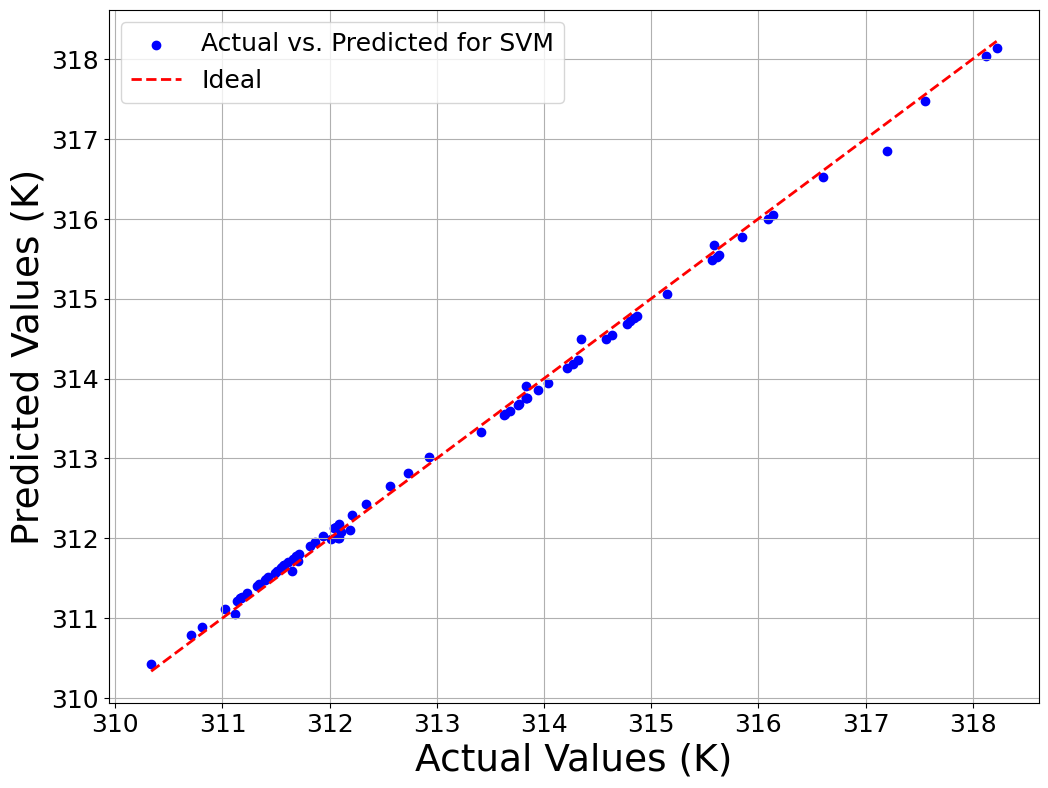

RMSE (Root Mean Squared Error): 0.09210
MSE (Mean Squared Error): 0.00848
MAE (Mean Absolute Error): 0.08575


In [24]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from bayes_opt import BayesianOptimization
import math

# Load data from the CSV file
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium.csv')

# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Define the SVM model with the Gaussian kernel and specified hyperparameters

# Define the SVM model with the Gaussian kernel and specified hyperparameters
#svm = SVR(kernel='rbf', C=664.17, epsilon=0.00, gamma=0.76)
svm = SVR(kernel='rbf', C=487.2152831251797, epsilon=0.08478564682622557, gamma=0.03160410266627556)
#svm = SVR(kernel='rbf', C=303.7957, epsilon=0.0029, gamma=1 / (2 * (28.2066 ** 2)))

# Train the SVM model on the entire dataset
svm.fit(X, y)

# Make predictions using the trained model
y_pred = svm.predict(X)

# Calculate the R2 score
r2 = r2_score(y, y_pred)

print(f'R2 Score: {r2:.4f}')

# Create a plot of predicted vs. actual values
plt.figure(figsize=(12, 9))
plt.scatter(y, y_pred, c='blue', label='Actual vs. Predicted for SVM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2, label='Ideal')
plt.xlabel('Actual Values (K)', fontsize = 27)
plt.ylabel('Predicted Values (K)', fontsize = 27)
#plt.title('Actual vs. Predicted Values for SVM', fontsize = 32) #SVM with Rbf Kernel
plt.legend(fontsize = 18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(True)
plt.show()
data.head()


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

print(f'RMSE (Root Mean Squared Error): {rmse:.5f}')
print(f'MSE (Mean Squared Error): {mse:.5f}')
print(f'MAE (Mean Absolute Error): {mae:.5f}')


Plotting AI and Taguchi

SVM AI-Taguchi

R2 Score: 0.9980


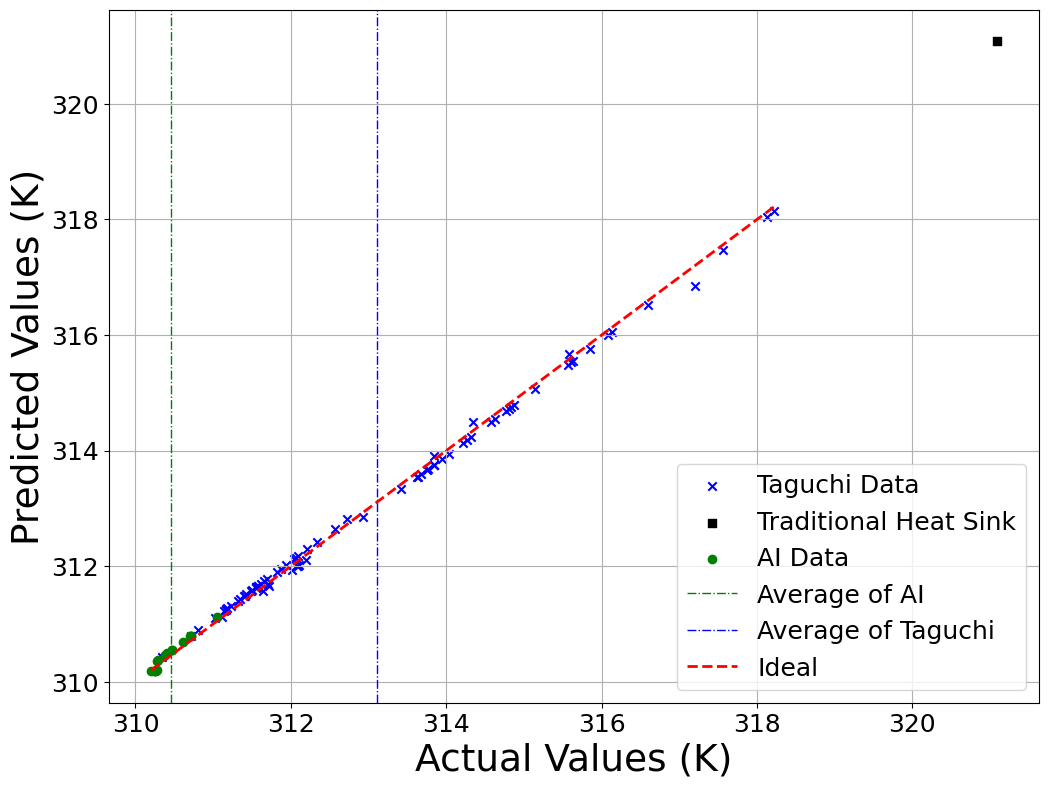

,Y-Bound,Cell Size,XY-Period,Z-P-Start,Z-P-End,t-base_min,Heigh-min_t,t-base_max,Height-max_t,radial-ramp_start-t,Start-radius_t-ramp,Radial-ramp_end-t,End-radius_t-ramp,Temperature,TAI
0,90.0,3.0,0.1,0.1,0.1,1.0,0.0,1.0,40.0,0.5,3.0,5.0,7.0,314.867,1
1,100.0,3.0,0.5,0.3,0.3,1.0,20.0,1.4,60.0,0.8,7.0,5.0,7.0,312.062,1
2,100.0,3.0,0.5,0.3,0.1,1.2,40.0,1.0,80.0,1.2,3.0,15.0,9.5,312.727,1
3,90.0,3.0,0.1,0.1,0.2,1.2,20.0,1.2,60.0,0.8,5.0,15.0,9.5,314.631,1
4,110.0,3.0,0.9,0.2,0.3,1.2,0.0,1.4,40.0,0.5,7.0,15.0,9.5,310.335,1


In [25]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score  # Import r2_score

# Load data from the CSV file
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium_v21.csv')

# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Define the SVM model with the RBF kernel and specified hyperparameters
svm = SVR(kernel='rbf', C=487.2152831251797, epsilon=0.08478564682622557, gamma=0.03160410266627556)

# Train the SVM model on the entire dataset
svm.fit(X, y)

# Make predictions using the trained model
y_pred = svm.predict(X)

# Calculate the R2 score
r2 = r2_score(y, y_pred)

print(f'R2 Score: {r2:.4f}')

# Create a plot of predicted vs. actual values
plt.figure(figsize=(12, 9))

# Plot Taguchi data points with 'x' in blue
taguchi_data = data[data['TAI'] == 1]

plt.scatter(taguchi_data['Temperature'], y_pred[taguchi_data.index], c='blue', marker='x', label='Taguchi Data')
taguchi_avg = taguchi_data['Temperature'].mean()
plt.scatter(321.084, 321.084, c='black', marker='s', label='Traditional Heat Sink')

# Plot AI data points with 'o' in green
ai_data = data[data['TAI'] == 0]
plt.scatter(ai_data['Temperature'], y_pred[ai_data.index], c='green', marker='o', label='AI Data')
ai_avg = ai_data['Temperature'].mean()

plt.axvline(x=ai_avg,  linestyle='-.', color ='green', linewidth=1, label='Average of AI')
plt.axvline(x=taguchi_avg, linestyle='-.', color ='blue', linewidth=1, label='Average of Taguchi')

plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2, label='Ideal')
plt.xlabel('Actual Values (K)', fontsize=27)
plt.ylabel('Predicted Values (K)', fontsize=27)
#plt.title('Actual vs. Predicted Values for SVM', fontsize=32) #(SVM with RBF Kernel)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize = 18)
plt.grid(True)
plt.show()
data.head()

Interactive Plot for AI-Taguchi

In [15]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.svm import SVR

# Load data from the CSV file
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium_v21.csv')

# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Define the SVM model with the RBF kernel and specified hyperparameters
svm = SVR(kernel='rbf', C=487.2152831251797, epsilon=0.08478564682622557, gamma=0.03160410266627556)

# Train the SVM model on the entire dataset
svm.fit(X, y)

# Make predictions using the trained model
y_pred = svm.predict(X)

# Add the predicted values to the DataFrame
data['Predicted_Temperature'] = y_pred

# Create an interactive scatter plot using Plotly Express with different colors
fig = px.scatter(data, x='Temperature', y='Predicted_Temperature', color='TAI', hover_name='Temperature',
                 color_discrete_map={0: 'green', 1: 'blue'})

# Add vertical lines for averages
taguchi_avg = data[data['TAI'] == 1]['Temperature'].mean()
ai_avg = data[data['TAI'] == 0]['Temperature'].mean()
fig.add_shape(type="line", x0=ai_avg, x1=ai_avg, y0=data['Predicted_Temperature'].min(), y1=data['Predicted_Temperature'].max(),
              line=dict(color="green", dash="dash"))
fig.add_shape(type="line", x0=taguchi_avg, x1=taguchi_avg, y0=data['Predicted_Temperature'].min(), y1=data['Predicted_Temperature'].max(),
              line=dict(color="blue", dash="dash"))

# Add a diagonal line for ideal
fig.add_shape(type="line", x0=data['Temperature'].min(), x1=data['Temperature'].max(), y0=data['Temperature'].min(), y1=data['Temperature'].max(),
              line=dict(color="red", dash="dash"))

# Update layout for labels and legends
fig.update_layout(
    xaxis_title='Actual Values (K)',
    yaxis_title='Predicted Values (K)',
    title='Actual vs. Predicted Values for SVM',
    legend_title='Data Type',
    showlegend=True
)

# Show the interactive plot
fig.show()


SVM-Lasso/Ridge

SVM R2 Score: 0.9977
Lasso R2 Score: 0.8949
Ridge R2 Score: 0.9616


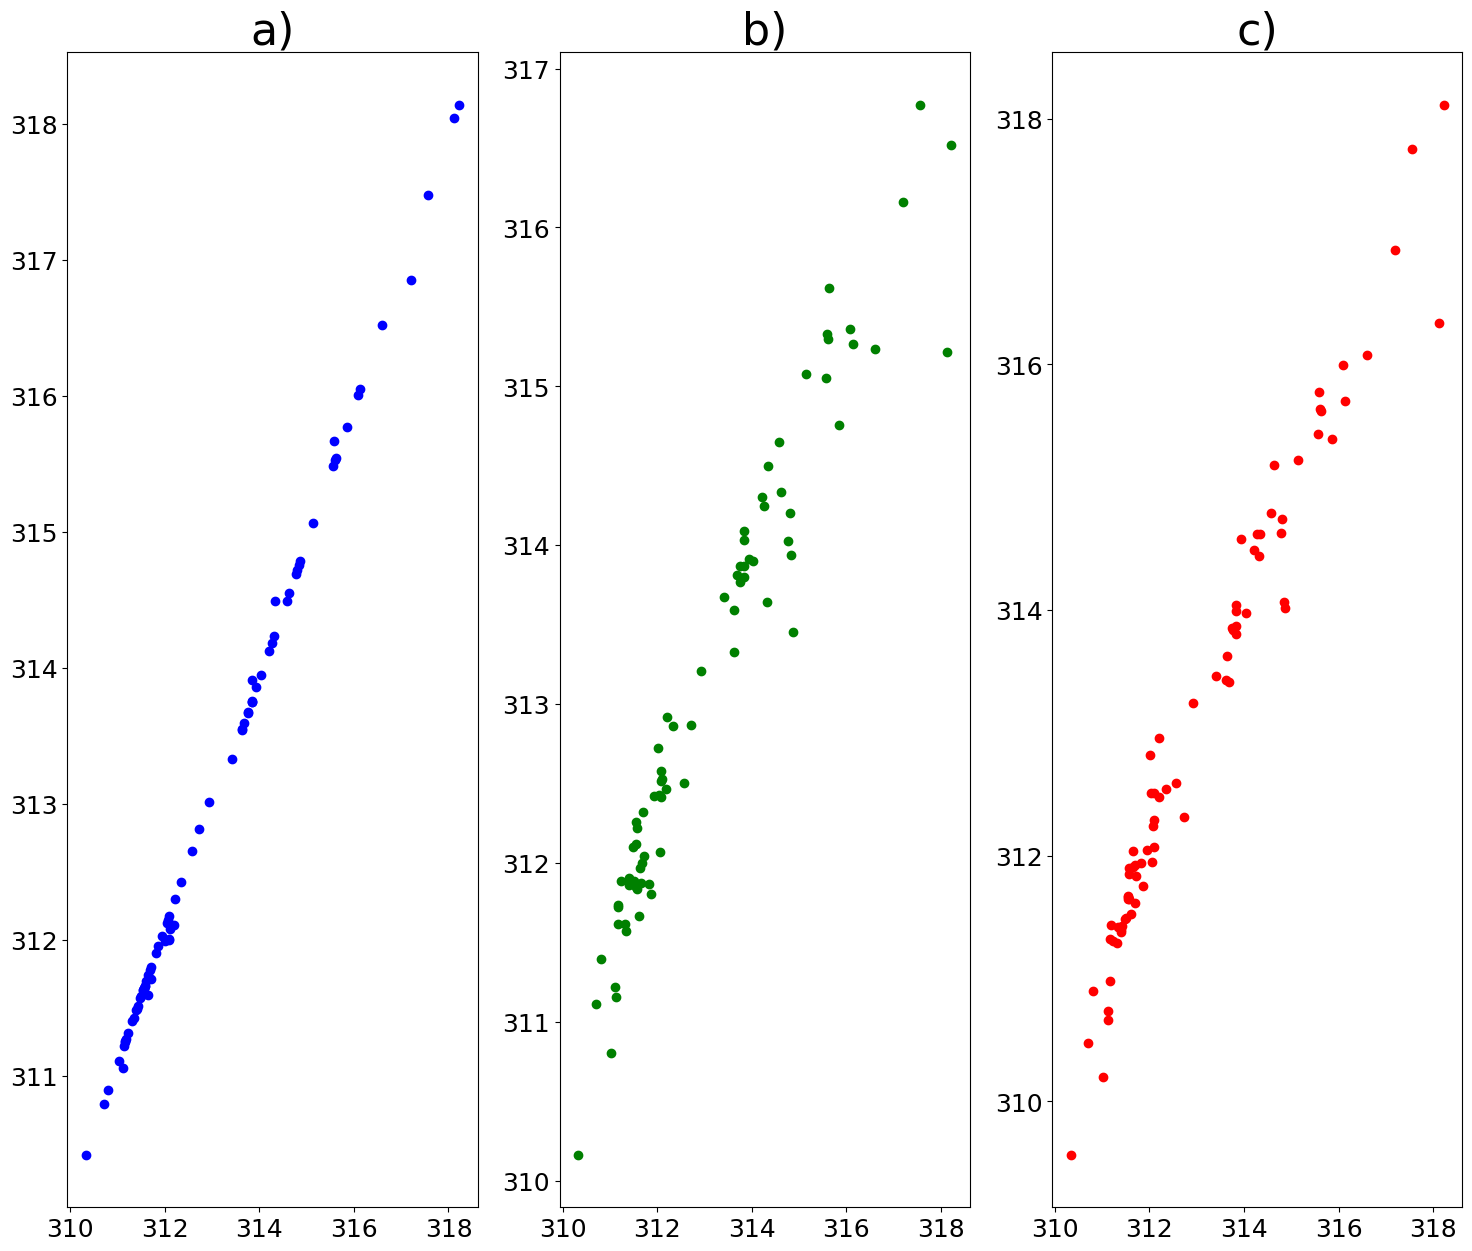

In [27]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load data from the CSV file
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium.csv')

# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Define the SVM model with the Gaussian kernel and specified hyperparameters
svm = SVR(kernel='rbf', C=487.2152831251797, epsilon=0.08478564682622557, gamma=0.03160410266627556)

# Train the SVM model on the entire dataset
svm.fit(X, y)

# Create Lasso (L1 regularization) and Ridge (L2 regularization) models
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter for L1 regularization
ridge = Ridge(alpha=0.1)  # You can adjust the alpha parameter for L2 regularization

# Train the Lasso and Ridge models
lasso.fit(X, y)
ridge.fit(X, y)

# Make predictions using the trained models
y_pred_svm = svm.predict(X)
y_pred_lasso = lasso.predict(X)
y_pred_ridge = ridge.predict(X)

# Calculate R2 scores for each model
r2_svm = r2_score(y, y_pred_svm)
r2_lasso = r2_score(y, y_pred_lasso)
r2_ridge = r2_score(y, y_pred_ridge)

print(f'SVM R2 Score: {r2_svm:.4f}')
print(f'Lasso R2 Score: {r2_lasso:.4f}')
print(f'Ridge R2 Score: {r2_ridge:.4f}')

# Create plots to compare predicted vs. actual values for each model
plt.figure(figsize=(18, 15))
plt.subplot(131)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.scatter(y, y_pred_svm, c='blue')
plt.title('a)', fontsize = 32) #SVM Predicted vs. Actual
plt.tick_params(axis='both', which='major', labelsize=18)
plt.subplot(132)
plt.scatter(y, y_pred_lasso, c='green')
plt.title('b)',  fontsize = 32) #Lasso Predicted vs. Actual
plt.tick_params(axis='both', which='major', labelsize=18)
plt.subplot(133)
plt.scatter(y, y_pred_ridge, c='red')
plt.title('c)',  fontsize = 32) #Ridge
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()


SVM with Genetic Algorithm

In [16]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from bayes_opt import BayesianOptimization

# Load data from the CSV file
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium.csv')

# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Define the objective function to be optimized
def objective_function(Y_Bound, Cell_Size, XY_Period, Z_P_Start, Z_P_End, t_base_min,
                       Heigh_min_t, t_base_max, Height_max_t, radial_ramp_start_t,
                       Start_radius_t_ramp, Radial_ramp_end_t, End_radius_t_ramp,
                       k2__noise_level):
    # Define the SVM model with the Gaussian kernel and specified hyperparameters
    svm = SVR(kernel='rbf', C=303.7957, epsilon=0.0029, gamma=1 / (2 * (28.2066 ** 2)))
    
    # Combine optimized and fixed parameters
    svm.set_params(C=303.7957, epsilon=0.0029, gamma=1 / (2 * (28.2066 ** 2)))
    
    # Train the SVM model and calculate the mean squared error
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    mse = np.mean((y_test - y_pred) ** 2)
    
    # Return the negative mean squared error as the objective to minimize
    return -mse

# Define the parameter search space for Bayesian optimization
param_space = {
    'Y_Bound': (90.0, 110.0),
    'Cell_Size': (3.0, 5.0),
    'XY_Period': (0.1, 0.9),
    'Z_P_Start': (0.1, 0.3),
    'Z_P_End': (0.1, 0.3),
    't_base_min': (1.0, 1.4),
    'Heigh_min_t': (0.0, 40.0),
    't_base_max': (1.0, 1.4),
    'Height_max_t': (40.0, 80.0),
    'radial_ramp_start_t': (0.5, 1.2),
    'Start_radius_t_ramp': (3.0, 7.0),
    'Radial_ramp_end_t': (5.0, 25.0),
    'End_radius_t_ramp': (7.0, 12.0),
    'k2__noise_level': (0.0, 1.0)  # Revised upper bound for noise level
}

# Create the BayesianOptimization object
optimizer = BayesianOptimization(f=objective_function, pbounds=param_space, random_state=7)

# Perform the optimization
optimizer.maximize(init_points=50, n_iter=100) # Number of initial points and iterations

# Get the optimal parameters and maximum score
opt_params = optimizer.max['params']
max_score = optimizer.max['target']


print("Optimal Parameters:")
for param, value in opt_params.items():
    print(f"{param}: {value}")

print("Maximum Negative Mean Squared Error:", max_score)

|   iter    |  target   | Cell_Size | End_ra... | Heigh_... | Height... | Radial... | Start_... | XY_Period |  Y_Bound  |  Z_P_End  | Z_P_Start | k2__no... | radial... | t_base... | t_base... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | -2.263    | 3.153     | 10.9      | 17.54     | 68.94     | 24.56     | 5.154     | 0.5009    | 91.44     | 0.1537    | 0.2       | 0.6792    | 1.063     | 1.152     | 1.026     |
| 2         | -2.263    | 3.576     | 11.55     | 8.535     | 58.08     | 23.62     | 3.1       | 0.5804    | 109.0     | 0.1461    | 0.2097    | 0.9091    | 0.5932    | 1.209     | 1.3       |
| 3         | -2.263    | 4.338     | 9.339     | 8.194     | 59.63     | 12.45     | 4.91      | 0.3927    | 106.8     | 0.2537    | 0.1628    | 0.5726    | 0.6932    | 1.181     | 1.141     |
| 4         | -2.263    | 4.31

In [7]:
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import itertools
from sklearn.metrics import r2_score

# Load data from the CSV file
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium_v2.csv')

# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Define the SVM model with the Gaussian kernel and specified hyperparameters
svm = SVR(kernel='rbf', C=303.7957, epsilon=0.0029, gamma=1 / (2 * (28.2066 ** 2)))
#svm = SVR(kernel='rbf', C=487.2152831251797, epsilon=0.08478564682622557, gamma=0.03160410266627556)

# Train the SVM model on the entire dataset
svm.fit(X, y)

# Initialize variables to record the global minimum temperature and its corresponding input parameters
global_min_temperature = float('inf')
global_min_parameters = None

# Define a range of values for each input parameter
'''parameter_ranges = {
    'Y-Bound': np.linspace(90.0, 110.0, 3),
    'Cell Size': np.linspace(3.0, 5.0, 3),
    'XY-Period': np.linspace(0.1, 0.9, 3),
    'Z-P-Start': np.linspace(0.1, 0.3, 3),
    'Z-P-End': np.linspace(0.1, 0.3, 3),
    't-base_min': np.linspace(1.0, 1.4, 3),
    'Heigh-min_t': np.linspace(0.0, 40.0, 3),
    't-base_max': np.linspace(1.0, 1.4, 3),
    'Height-max_t': np.linspace(40.0, 80.0, 3),
    'radial-ramp_start-t': np.linspace(0.5, 1.2, 3),
    'Start-radius_t-ramp': np.linspace(3.0, 7.0, 3),
    'Radial-ramp_end-t': np.linspace(5.0, 25.0, 3),
    'End-radius_t-ramp': np.linspace(7.0, 12.0, 3),
}
'''
parameter_ranges = {
    'Y-Bound': np.linspace(100, 100, 1),
    'Cell Size': np.linspace(3.0, 3.0, 1),
    'XY-Period': np.linspace(0.9, 0.9, 1),
    'Z-P-Start': np.linspace(0.1, 0.1, 1),
    'Z-P-End': np.linspace(0.1, 0.1, 1),
    't-base_min': np.linspace(1.4, 1.4, 1),
    'Heigh-min_t': np.linspace(25.0, 40.0, 20),
    't-base_max': np.linspace(1.0, 1.4, 20),
    'Height-max_t': np.linspace(70.0, 80.0, 20),
    'radial-ramp_start-t': np.linspace(0.5, 0.5, 1),
    'Start-radius_t-ramp': np.linspace(3.0, 7.0, 20),
    'Radial-ramp_end-t': np.linspace(5.0, 5.0, 1),
    'End-radius_t-ramp': np.linspace(7.0, 7.0, 1),
}

# Iterate through the parameter combinations
for parameter_combination in itertools.product(*parameter_ranges.values()):
    input_parameters = dict(zip(parameter_ranges.keys(), parameter_combination))
    
    # Convert the input parameters to a DataFrame
    input_data = pd.DataFrame([input_parameters], columns=numeric_cols)
    
    # Use the trained SVM model to make the prediction
    predicted_temperature = svm.predict(input_data)
    
    # Check if the current prediction is lower than the global minimum
    if predicted_temperature < global_min_temperature:
        global_min_temperature = predicted_temperature
        global_min_parameters = input_parameters

print(f'Global Minimum Temperature: {global_min_temperature[0]:.2f} °C')
print('Corresponding Input Parameters:')
for key, value in global_min_parameters.items():
    print(f'{key}: {value:.2f}')

# Calculate R^2 value
y_pred = svm.predict(X)
r2 = r2_score(y, y_pred)
print(f'R^2 Value: {r2:.2f}')


Global Minimum Temperature: 309.78 °C
Corresponding Input Parameters:
Y-Bound: 100.00
Cell Size: 3.00
XY-Period: 0.90
Z-P-Start: 0.10
Z-P-End: 0.10
t-base_min: 1.40
Heigh-min_t: 36.05
t-base_max: 1.40
Height-max_t: 75.26
radial-ramp_start-t: 0.50
Start-radius_t-ramp: 3.00
Radial-ramp_end-t: 5.00
End-radius_t-ramp: 7.00
R^2 Value: 0.93


In [20]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Load data from the CSV file
data = pd.read_csv('/Users/emirtuna/Desktop/aliminium_v2.csv')

# Convert specific columns to float data type
numeric_cols = ['Y-Bound', 'Cell Size', 'XY-Period', 'Z-P-Start', 'Z-P-End', 't-base_min',
                'Heigh-min_t', 't-base_max', 'Height-max_t', 'radial-ramp_start-t',
                'Start-radius_t-ramp', 'Radial-ramp_end-t', 'End-radius_t-ramp']
data[numeric_cols] = data[numeric_cols].astype(float)

# Define the input features (X) and the target variable (y)
X = data.drop('Temperature', axis=1)
y = data['Temperature']

# Define the SVM model with the Gaussian kernel
svm = SVR(kernel='rbf')

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'C': uniform(1, 1000),  # Example range for C parameter
    'epsilon': uniform(0.001, 0.1),  # Example range for epsilon parameter
    'gamma': uniform(0.001, 1)  # Example range for gamma parameter
}

# Initialize RandomizedSearchCV with SVM model and parameter grid
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)

# Perform the randomized search on the dataset
random_search.fit(X, y)

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(random_search.best_params_)

# Print the best cross-validation score
print("Best CV Score:", random_search.best_score_)

# Optionally, you can also access the best model
best_svm = random_search.best_estimator_

# You can use best_svm for predictions or further analysis


Best Hyperparameters:
{'C': 78.87096708772701, 'epsilon': 0.0909297604276998, 'gamma': 0.0018432519262904226}
Best CV Score: -0.8601088493518985
